### IMPORTS

In [1]:
from Inference import BBVI 
import torch
import matplotlib.pyplot as plt

### EXAMPLE

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [3]:
# load data
data = torch.load('Data/foong_data.pt')
x_data = data[0].to(device)
y_data = data[1].to(device)
y_data = y_data.unsqueeze(-1)

In [9]:
Net = BBVI.VariationalNetwork(input_size=1, output_size=1, layer_width=30, nb_layers=2, device=device)

In [10]:
optimizer = torch.optim.Adam
optimizer_params = {'lr': 0.5}

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau
scheduler_params = {'patience': 5, 'factor': 0.8}

In [11]:
voptimizer = BBVI.VariationalOptimizer(model=Net, sigma_noise=0.1, optimizer=optimizer, optimizer_params=optimizer_params, scheduler=scheduler, scheduler_params=scheduler_params, min_lr=0.0001, adaptive_ELBO_variance_rate=1.0)

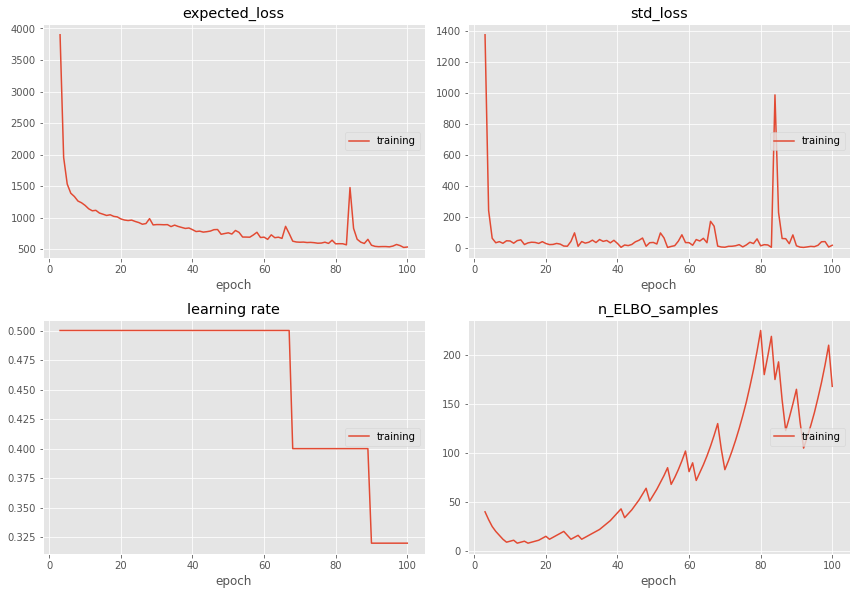

expected_loss:
training   (min:  531.418, max: 500642.594, cur:  537.929)

std_loss:
training   (min:    5.268, max: 1088713.250, cur:   19.334)

learning rate:
training   (min:    0.320, max:    0.500, cur:    0.320)

n_ELBO_samples:
training   (min:    8.000, max:  225.000, cur:  168.000)
-6.510803


In [12]:
Net = voptimizer.run((x_data,y_data), n_epoch=100, n_iter=20, n_ELBO_samples=50, plot=True)

In [ ]:
x_test = torch.linspace(-2.0, 2.0).unsqueeze(1).to(device)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.scatter(x_data.cpu(), y_data.cpu())
for _ in range(1000):
    Net.sample_parameters()

    y_test = Net.forward(x_test)
    plt.plot(x_test.detach().cpu().numpy(), y_test.squeeze(0).detach().cpu().numpy(), alpha=0.05, linewidth=1, color='lightblue')

In [ ]:
data_validation = torch.load('Data/foong_data_validation.pt')
x_data_validation = data_validation[0].to(device)
y_data_validation = data_validation[1].to(device)
y_data_validation = y_data_validation.unsqueeze(-1)

In [ ]:
Net.sample_parameters(M=997)

In [ ]:
y_pred_validation = Net.forward(x_data_validation)

In [ ]:
y_pred_validation.shape

In [ ]:
scheduler

In [ ]:
LL = Net._log_norm(y_pred_validation, y_data_validation, torch.tensor(0.1).to(device))

In [ ]:
LL.sum(dim=[1,2]).shape

In [ ]:
LL.sum(dim=[1,2]).mean()

In [ ]:
Net.compute_elbo(x_data, y_data, n_samples_ELBO=100000, sigma_noise=0.1, device=device)